In [1]:
#Select Encoding for representation
import numpy as np
import pandas as pd
import os, re, math, platform
from pathlib import Path
import matplotlib.pyplot as plt
import json
import joblib
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc, fbeta_score
from imblearn.metrics import geometric_mean_score
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier 
from xgboost import plot_importance
#!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis as PA
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor
from matplotlib import pyplot
from sklearn.metrics import matthews_corrcoef, confusion_matrix,precision_recall_curve, roc_curve, auc, fbeta_score,roc_auc_score
from fea_extract import read_fasta,insert_AAC,insert_DPC,insert_CKSAAGP,insert_CTD,insert_PAAC,insert_AAI,insert_GTPC,insert_QSO,insert_AAE,insert_PSAAC,insert_word2int,insert_ASDC
import warnings 
from tools import cv,evaluate
warnings.filterwarnings('ignore')

In [2]:
seed = 10
Path('./results/evalue/').mkdir(exist_ok=True,parents=True)
Path('./results/evalue_balance/').mkdir(exist_ok=True,parents=True)

In [3]:
def pro_data(seq):
    df_n = insert_PAAC(seq)
    df_n = insert_AAC(df_n)
    df_n = insert_CKSAAGP(df_n)
    df_n = insert_CTD(df_n)
    #df_n = insert_DPC(df_n)
    #df_n = insert_GTPC(df_n)
    #df_n = insert_QSO(df_n)
    #df_n = insert_AAE(df_n)
    #df_n = insert_ASDC(df_n)
    #df_n = insert_word2int(df_n)
    return df_n

In [4]:
#for reviw paper, evaluation on ACP10
seq_X_train = pd.read_csv('data/train/X_train.csv')
seq_X_test = pd.read_csv('data/test/acp10/test.csv')
seq_y_train = pd.read_csv('data/train/y_train.csv')
seq_y_test = pd.read_csv('data/test/acp10/y_test1.csv')

In [5]:
Seq_X_train = pro_data(seq_X_train)
Seq_X_test = pro_data(seq_X_test)

In [6]:
Seq_X_train.to_csv('data/train/Seq_X_train_all.csv',index=False)
Seq_X_test.to_csv('data/test/Seq_X_test_all.csv',index=False)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.svm import LinearSVC

ml = ["LGBM","GBDT","ET","RF","XGBoost","voting_clf"]

#layer_one= [  LGBMClassifier(random_state = seed),ExtraTreesClassifier(random_state=seed),RandomForestClassifier(random_state=seed),MLPClassifier(hidden_layer_sizes=900,learning_rate="adaptive",random_state=seed)]
                     #('rf5',GaussianNB()),
#                   ('SVM', SVC(kernel='linear',probability=True))]
#layer_two = [SVC(random_state=seed,probability=True), ExtraTreesClassifier(random_state=seed),RandomForestClassifier(random_state=seed),LGBMClassifier(random_state = seed)]
             #GaussianNB()]
#                   ('SVC', SVC(kernel='linear',probability=True))]



#layer_two_meta= StackingClassifier(classifiers = layer_two, meta_classifier=LogisticRegression())    
#DT  = DecisionTreeClassifier(random_state=seed)
LGBM = LGBMClassifier(random_state = seed)
GBDT = GradientBoostingClassifier(random_state=seed)
ET = ExtraTreesClassifier(random_state=seed)
#SVM = SVC(random_state=seed,probability=True)
#MLP = MLPClassifier(hidden_layer_sizes=1200,learning_rate="adaptive",random_state=seed)
RF = RandomForestClassifier(random_state=seed)
XGBoost = XGBClassifier(random_state=seed)
#LR  = LogisticRegression(random_state=seed,solver='liblinear')
#AB = AdaBoostClassifier(random_state=seed)


#SDG = SGDClassifier(max_iter=1200, tol=1e-3) 
voting_clf = VotingClassifier(estimators = [('xgb',XGBoost),('ET',ET)], voting = 'soft')
#Bagging_clf = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=seed))
#VOT_STACK = StackingClassifier(classifiers = voting_clf, meta_classifier=LR)
#stacking = StackingClassifier(classifiers=[LGBM,XGBoost,GBDT],meta_classifier=LR)
#Two_eclf = StackingClassifier(classifiers=layer_one, meta_classifier=layer_two_meta)

In [8]:
fea = Seq_X_train.columns[2:]
X_train = Seq_X_train[fea].to_numpy()
X_test = Seq_X_test[fea].to_numpy()
y_train = seq_y_train.to_numpy()
y_test = seq_y_test.to_numpy()

In [9]:
X_train.shape

(1520, 265)

In [10]:
X_test.shape

(20, 265)

In [11]:
X_train

array([[0.27018745, 0.        , 0.        , ..., 0.04296875, 0.04296875,
        0.04296875],
       [0.        , 0.40979551, 0.81959102, ..., 0.01902497, 0.02615933,
        0.03210464],
       [0.        , 0.20836102, 0.        , ..., 0.01388889, 0.01388889,
        0.0625    ],
       ...,
       [1.07655063, 0.        , 1.43540084, ..., 0.01086464, 0.01674966,
        0.0212766 ],
       [0.90127313, 0.        , 0.30042438, ..., 0.00888889, 0.03111111,
        0.06666667],
       [1.42636493, 0.        , 0.47545498, ..., 0.01777778, 0.02555556,
        0.03333333]])

In [12]:
X_test.shape

(20, 265)

In [13]:
y_test


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [14]:
index = []
ALL_eval=pd.DataFrame()
for i in ml:
    print('process_{}'.format(i))
    model = eval(i)
    Evals = cv(model,X_train,y_train)
    ALL_eval = pd.concat([ALL_eval,Evals],axis=1)
    index.append("{}".format(i))
ALL_eval.columns = index

process_LGBM
[LightGBM] [Info] Number of positive: 608, number of negative: 608
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44550
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 265
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 625, number of negative: 591
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 43974
[LightGBM] [Info] Number of data points in the train set: 1216, number of used features: 265
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513980 -> initscore=0.055936
[LightGBM] [Info] Start training f

In [15]:
voting_preds = voting_clf.predict(X_test)

In [16]:
ALL_eval

,LGBM,GBDT,ET,RF,XGBoost,voting_clf
ACC,0.922368,0.911842,0.918421,0.911842,0.915132,0.917105
F1,0.920290,0.910178,0.914762,0.909453,0.913646,0.915602
F2,0.908146,0.903150,0.894414,0.897369,0.906928,0.907813
GMean,0.922373,0.912015,0.917812,0.911774,0.915133,0.917259
SEN,0.900377,0.898658,0.881421,0.889607,0.902649,0.902841
PREC,0.941953,0.922707,0.951205,0.930879,0.925694,0.929521
SPEC,0.945290,0.925856,0.955925,0.934768,0.928156,0.932248
MCC,0.846054,0.824287,0.839126,0.824723,0.830860,0.834981
AUC,0.973772,0.969656,0.973862,0.970234,0.973966,0.976039
AUPR,0.977354,0.973305,0.977559,0.973476,0.977327,0.979984


In [17]:
index = []
ALL_eval_test=pd.DataFrame()
for i in ml:
    eval_dict = []
    print('process_{}'.format(i))
    model = eval(i)
    model.fit(X_train,y_train)
    eval_dictionary = evaluate(X_test,y_test,model)
    eval_dict = eval_dict+[eval_dictionary]
    Evals = pd.DataFrame(eval_dict).T
    ALL_eval_test = pd.concat([ALL_eval_test,Evals],axis=1)
    index.append("{}".format(i))
ALL_eval_test.columns = index

process_LGBM
[LightGBM] [Info] Number of positive: 763, number of negative: 757
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46855
[LightGBM] [Info] Number of data points in the train set: 1520, number of used features: 265
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501974 -> initscore=0.007895
[LightGBM] [Info] Start training from score 0.007895
process_GBDT
process_ET
process_RF
process_XGBoost
process_voting_clf


In [34]:
ALL_eval_test

,LGBM,GBDT,ET,RF,XGBoost,voting_clf
ACC,1.0,1.0,0.900000,0.900000,1.0,1.0
F1,1.0,1.0,0.909091,0.909091,1.0,1.0
F2,1.0,1.0,0.961538,0.961538,1.0,1.0
GMean,1.0,1.0,0.894427,0.894427,1.0,1.0
SEN,1.0,1.0,1.000000,1.000000,1.0,1.0
PREC,1.0,1.0,0.833333,0.833333,1.0,1.0
SPEC,1.0,1.0,0.800000,0.800000,1.0,1.0
MCC,1.0,1.0,0.816497,0.816497,1.0,1.0
AUC,1.0,1.0,0.995000,1.000000,1.0,1.0
AUPR,1.0,1.0,0.990909,1.000000,1.0,1.0


In [18]:
index = []
ALL_probabilities = pd.DataFrame()

for i in ml:
    print('Processing {}'.format(i))
    model = eval(i)
    model.fit(X_train, y_train)
    
    # Get probabilities for positive class (class 1)
    probabilities = model.predict_proba(X_test)[:, 1]
    
    # Store probabilities in a DataFrame
    ALL_probabilities[i] = probabilities
    
    index.append("{}".format(i))

ALL_probabilities.columns = index

Processing LGBM
[LightGBM] [Info] Number of positive: 763, number of negative: 757
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46855
[LightGBM] [Info] Number of data points in the train set: 1520, number of used features: 265
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501974 -> initscore=0.007895
[LightGBM] [Info] Start training from score 0.007895
Processing GBDT
Processing ET
Processing RF
Processing XGBoost
Processing voting_clf


In [19]:
ALL_probabilities

,LGBM,GBDT,ET,RF,XGBoost,voting_clf
0,0.999245,0.965714,0.63,0.70,0.996427,0.813214
1,0.973636,0.719205,0.62,0.68,0.846811,0.733405
2,0.902550,0.907979,0.66,0.65,0.890413,0.775207
3,0.999968,0.992246,1.00,0.99,0.999960,0.999980
4,0.998209,0.974646,0.71,0.75,0.993489,0.851745
5,0.999951,0.987460,0.97,0.99,0.999645,0.984823
6,0.999692,0.983516,0.96,0.98,0.999409,0.979705
7,0.992323,0.940815,0.86,0.94,0.999051,0.929526
8,0.998751,0.984029,0.90,0.95,0.998861,0.949431
9,0.998268,0.969351,0.74,0.78,0.995513,0.867756


Processing LGBM
[LightGBM] [Info] Number of positive: 763, number of negative: 757
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46855
[LightGBM] [Info] Number of data points in the train set: 1520, number of used features: 265
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501974 -> initscore=0.007895
[LightGBM] [Info] Start training from score 0.007895


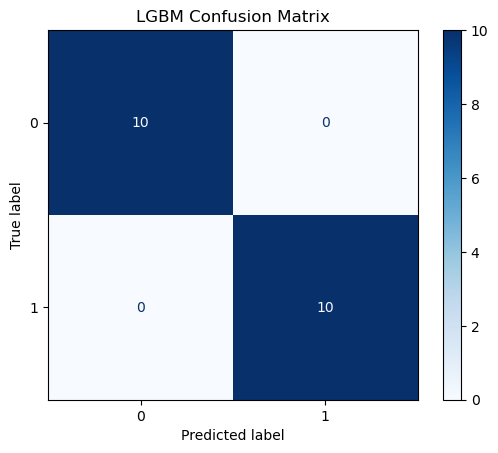

Processing GBDT


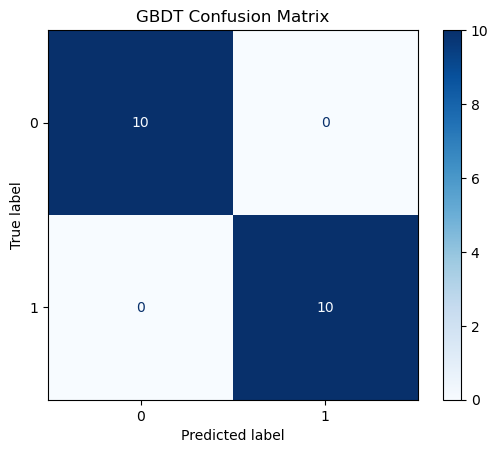

Processing ET


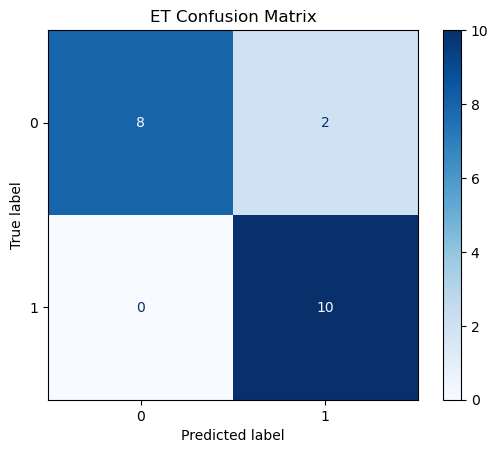

Processing RF


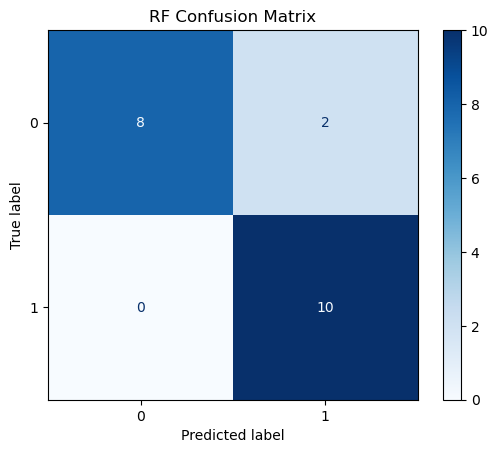

Processing XGBoost


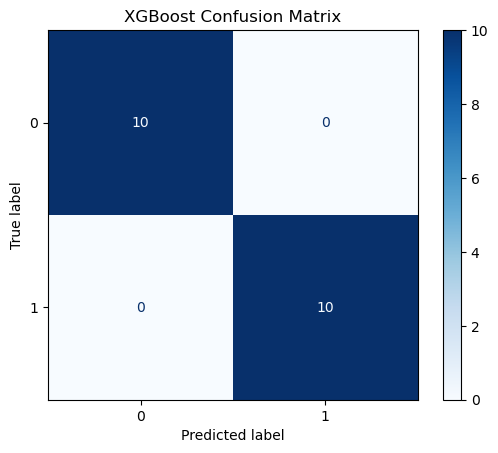

Processing voting_clf


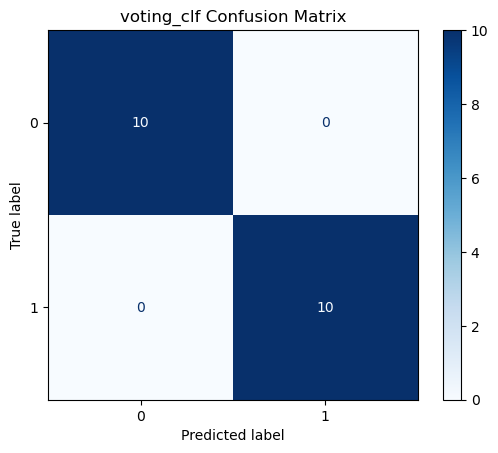

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

index = []
ALL_probabilities = pd.DataFrame()

for i in ml:
    print('Processing {}'.format(i))
    model = eval(i)
    model.fit(X_train, y_train)
    
    # Get probabilities for positive class (class 1)
    probabilities = model.predict_proba(X_test)[:, 1]
    
    # Store probabilities in a DataFrame
    ALL_probabilities[i] = probabilities
    
    # Plot confusion matrix
    disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title('{} Confusion Matrix'.format(i))
    plt.show()
    
    index.append("{}".format(i))

ALL_probabilities.columns = index

In [21]:
import os
os.getcwd()

'/home/sadik/ACP/Alternate'

In [22]:
# Reshape input data for CNN (assuming X_train and X_test are sequences of features)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
# Convert labels to one-hot encoding for CNN
from tensorflow.keras.utils import to_categorical
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

2024-04-17 11:37:08.395526: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-17 11:37:08.395582: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2024-04-17 11:37:09.585515: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-17 11:37:09.592022: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2024-04-17 11:37:09.592800: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-04-17 11:37:09.593825: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Netwo

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/6 [========================>.....] - ETA: 0s - loss: 0.6497 - accuracy: 0.6719WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd8080ec170> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and at

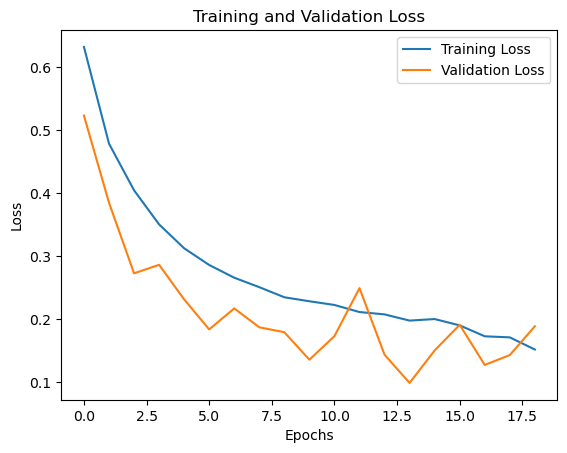

1/1 [==============================] - 0s 28ms/step - loss: 0.0992 - accuracy: 0.9500
Test Loss: 0.09919597953557968
Test Accuracy: 0.949999988079071


In [24]:
# Build CNN Model
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
#from tensorflow.keras.optimizers import Adam

learning_rate = 0.0001
#rom keras.utils import to_categorical
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 output classes (binary classification)


# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
# Compile CNN Model

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN Model
history = model.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=256, validation_data=(X_test_cnn, y_test_cnn),callbacks=[checkpoint, early_stopping])


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate CNN Model
loss, accuracy = model.evaluate(X_test_cnn, y_test_cnn)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
# Evaluate CNN Model
#oss, accuracy = model.evaluate(X_test_cnn, y_test_cnn)
#rint('Test Loss:', loss)
#rint('Test Accuracy:', accuracy)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 263, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 131, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 129, 128)          24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 64, 128)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [26]:
cnn_preds = model.predict(X_test_cnn)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [27]:
cnn_preds

array([[2.6148442e-05, 9.9997389e-01],
       [1.1417235e-04, 9.9988580e-01],
       [1.2156947e-02, 9.8784304e-01],
       [2.2172146e-06, 9.9999774e-01],
       [7.6640747e-04, 9.9923360e-01],
       [3.8804901e-06, 9.9999607e-01],
       [3.7291149e-05, 9.9996269e-01],
       [6.8099092e-05, 9.9993193e-01],
       [1.7565716e-03, 9.9824345e-01],
       [4.3123934e-04, 9.9956876e-01],
       [2.5991780e-01, 7.4008226e-01],
       [9.9989915e-01, 1.0084124e-04],
       [7.7391618e-01, 2.2608383e-01],
       [9.9968970e-01, 3.1032279e-04],
       [9.9961215e-01, 3.8781704e-04],
       [9.8351800e-01, 1.6481999e-02],
       [9.9979597e-01, 2.0403403e-04],
       [9.9812418e-01, 1.8757845e-03],
       [9.9993348e-01, 6.6502784e-05],
       [9.8913670e-01, 1.0863282e-02]], dtype=float32)

In [28]:
voting_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
# Convert class labels to one-hot encoding
num_classes = 2
voting_preds_onehot = np.eye(num_classes)[voting_preds]

In [30]:
voting_preds_onehot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [31]:
# Average the predictions
average_preds = (cnn_preds + voting_preds_onehot) / 2

In [32]:
# Convert average predictions to binary labels (0 or 1)
average_labels = np.argmax(average_preds, axis=1)

In [33]:
# Compute evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, matthews_corrcoef
accuracy = accuracy_score(y_test, average_labels)
sensitivity = recall_score(y_test, average_labels)
specificity = recall_score(y_test, average_labels, pos_label=0)  # For binary classification
mcc = matthews_corrcoef(y_test, average_labels)

print('Accuracy:', accuracy)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('MCC:', mcc)

Accuracy: 0.95
Sensitivity: 1.0
Specificity: 0.9
MCC: 0.9045340337332909
